# Problem Statement

## Context

In the realm of modern finance, businesses encounter the perpetual challenge of managing debt obligations effectively to maintain a favorable credit standing and foster sustainable growth. Investors keenly scrutinize companies capable of navigating financial complexities while ensuring stability and profitability. A pivotal instrument in this evaluation process is the balance sheet, which provides a comprehensive overview of a company's assets, liabilities, and shareholder equity, offering insights into its financial health and operational efficiency. In this context, leveraging available financial data, particularly from preceding fiscal periods, becomes imperative for informed decision-making and strategic planning.

## Objective

A group of venture capitalists want to develop a Financial Health Assessment Tool. With the help of the tool, it endeavors to empower businesses and investors with a robust mechanism for evaluating the financial well-being and creditworthiness of companies. By harnessing machine learning techniques, the organization aims to analyze historical financial statements and extract pertinent insights to facilitate informed decision-making via the tool. Specifically, the organization foresees facilitating the following with the help of the tool:

1. Debt Management Analysis: Identify patterns and trends in debt management practices to assess the ability of businesses to fulfill financial obligations promptly and efficiently, and identify potential cases of default.

2. Credit Risk Evaluation: Evaluate credit risk exposure by analyzing liquidity ratios, debt-to-equity ratios, and other key financial indicators to ascertain the likelihood of default and inform investment decisions.

They have hired you as a data scientist and provided you with the financial metrics of different companies. The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. The predictive model will help the organization anticipate potential challenges with the financial performance of the companies and enable proactive risk mitigation strategies.

## Data Dictionary

Please refer Business Report

# Importing necessary libraries

In [641]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
)

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }<\style>'))

# Loading the Data

In [643]:
# reading data
import os
path = os.getcwd() + '\\Company29.csv'
data = pd.read_csv(path)
data.head()

# copying data to another variable to avoid any changes to original data
df = data.copy()

In [644]:
# Creating 'Default' column as it is not present using the given guidance:- 
# A company will not be tagged as a defaulter if its net worth next year is positive, or else, it'll be tagged as a defaulter.
df['Default'] = df['Networth Next Year'].apply(lambda x: 0 if x > 0 else 1)
df.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1           395.30000     827.60000  336.50000     534.10000   
1    2            36.20000      67.70000   24.30000     137.90000   
2    3            84.00000     238.40000   78.90000     331.20000   
3    4          2041.40000    6883.50000 1443.30000    8448.50000   
4    5            41.80000      90.90000   47.00000     388.60000   

   Change in stock  Total expenses  Profit after tax    PBDITA       PBT  \
0         13.50000       508.70000          38.90000 124.40000  64.60000   
1         -3.70000       131.00000           3.20000   5.50000   1.00000   
2        -18.10000       309.20000           3.90000  25.80000  10.50000   
3        212.20000      8482.40000         178.30000 418.40000 185.10000   
4          3.40000       392.70000          -0.70000   7.20000  -0.60000   

   Cash profit  PBDITA as % of total income  PBT as % of total income  \
0     95.20000                     23.29000                  12.10000   
1      3.80000                      3.99000                   0.73000   
2      9.40000                      7.79000                   3.17000   
3    178.00000                      4.95000                   2.19000   
4      3.90000                      1.85000                  -0.15000   

   PAT as % of total income  Cash profit as % of total income  \
0                   7.28000                          17.82000   
1                   2.32000                           2.76000   
2                   1.18000                           2.84000   
3                   2.11000                           2.11000   
4                  -0.18000                           1.00000   

   PAT as % of net worth      Sales  Income from fincial services  \
0               12.27000  533.50000                       0.60000   
1                0.00000  135.50000                           NaN   
2                5.07000  330.60000                       0.60000   
3               13.17000 8444.20000                       2.00000   
4               -1.48000  387.60000                       0.20000   

   Other income  Total capital  Reserves and funds  Borrowings  \
0           NaN       87.60000           249.00000   390.70000   
1       0.20000       11.90000             4.30000    16.60000   
2           NaN       25.00000            56.70000    44.70000   
3           NaN      100.00000          1343.30000  2789.30000   
4       0.80000       10.70000            35.80000    25.50000   

   Current liabilities & provisions  Deferred tax liability  \
0                          43.90000                56.40000   
1                          23.70000                 3.10000   
2                         102.20000                 9.80000   
3                        2650.80000                 0.10000   
4                          14.10000                 4.30000   

   Shareholders funds  Cumulative retained profits  Capital employed  TOL/TNW  \
0           336.50000                    248.90000         727.20000  1.28000   
1            24.30000                     -8.20000          40.90000  1.53000   
2            78.90000                     53.10000         123.60000  1.70000   
3          1443.30000                    593.30000        4232.60000  3.69000   
4            47.00000                     35.80000          72.50000  0.81000   

   Total term liabilities / tangible net worth  \
0                                      0.99000   
1                                      0.21000   
2                                      0.33000   
3                                      0.22000   
4                                      0.44000   

   Contingent liabilities / Net worth (%)  Contingent liabilities  \
0                               186.21000               626.60000   
1                                47.74000                11.60000   
2                                30.42000                24.00000   
3                                10.79000     

# Data Overview

In [646]:
df.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1           395.30000     827.60000  336.50000     534.10000   
1    2            36.20000      67.70000   24.30000     137.90000   
2    3            84.00000     238.40000   78.90000     331.20000   
3    4          2041.40000    6883.50000 1443.30000    8448.50000   
4    5            41.80000      90.90000   47.00000     388.60000   

   Change in stock  Total expenses  Profit after tax    PBDITA       PBT  \
0         13.50000       508.70000          38.90000 124.40000  64.60000   
1         -3.70000       131.00000           3.20000   5.50000   1.00000   
2        -18.10000       309.20000           3.90000  25.80000  10.50000   
3        212.20000      8482.40000         178.30000 418.40000 185.10000   
4          3.40000       392.70000          -0.70000   7.20000  -0.60000   

   Cash profit  PBDITA as % of total income  PBT as % of total income  \
0     95.20000                     23.29000                  12.10000   
1      3.80000                      3.99000                   0.73000   
2      9.40000                      7.79000                   3.17000   
3    178.00000                      4.95000                   2.19000   
4      3.90000                      1.85000                  -0.15000   

   PAT as % of total income  Cash profit as % of total income  \
0                   7.28000                          17.82000   
1                   2.32000                           2.76000   
2                   1.18000                           2.84000   
3                   2.11000                           2.11000   
4                  -0.18000                           1.00000   

   PAT as % of net worth      Sales  Income from fincial services  \
0               12.27000  533.50000                       0.60000   
1                0.00000  135.50000                           NaN   
2                5.07000  330.60000                       0.60000   
3               13.17000 8444.20000                       2.00000   
4               -1.48000  387.60000                       0.20000   

   Other income  Total capital  Reserves and funds  Borrowings  \
0           NaN       87.60000           249.00000   390.70000   
1       0.20000       11.90000             4.30000    16.60000   
2           NaN       25.00000            56.70000    44.70000   
3           NaN      100.00000          1343.30000  2789.30000   
4       0.80000       10.70000            35.80000    25.50000   

   Current liabilities & provisions  Deferred tax liability  \
0                          43.90000                56.40000   
1                          23.70000                 3.10000   
2                         102.20000                 9.80000   
3                        2650.80000                 0.10000   
4                          14.10000                 4.30000   

   Shareholders funds  Cumulative retained profits  Capital employed  TOL/TNW  \
0           336.50000                    248.90000         727.20000  1.28000   
1            24.30000                     -8.20000          40.90000  1.53000   
2            78.90000                     53.10000         123.60000  1.70000   
3          1443.30000                    593.30000        4232.60000  3.69000   
4            47.00000                     35.80000          72.50000  0.81000   

   Total term liabilities / tangible net worth  \
0                                      0.99000   
1                                      0.21000   
2                                      0.33000   
3                                      0.22000   
4                                      0.44000   

   Contingent liabilities / Net worth (%)  Contingent liabilities  \
0                               186.21000               626.60000   
1                                47.74000                11.60000   
2                                30.42000                24.00000   
3                                10.79000     

In [647]:
df.tail()

Num  Networth Next Year  Total assets  Net worth  Total income  \
4251  4252             0.20000       0.40000    0.20000           NaN   
4252  4253            93.30000     159.60000   86.70000     172.90000   
4253  4254           932.20000     833.80000  664.60000    2314.70000   
4254  4255            64.60000      95.00000   48.50000     110.50000   
4255  4256             0.00000     384.60000  111.30000     345.80000   

      Change in stock  Total expenses  Profit after tax    PBDITA       PBT  \
4251              NaN             NaN               NaN       NaN       NaN   
4252          0.10000       169.70000           3.30000  18.40000   3.70000   
4253         32.10000      2151.60000         195.20000 348.40000 303.00000   
4254          4.60000       113.50000           1.60000   9.70000   2.60000   
4255         11.30000       341.70000          15.40000  57.60000  20.70000   

      Cash profit  PBDITA as % of total income  PBT as % of total income  \
4251          NaN                      0.00000                   0.00000   
4252     12.60000                     10.64000                   2.14000   
4253    219.50000                     15.05000                  13.09000   
4254      6.70000                      8.78000                   2.35000   
4255     34.80000                     16.66000                   5.99000   

      PAT as % of total income  Cash profit as % of total income  \
4251                   0.00000                           0.00000   
4252                   1.91000                           7.29000   
4253                   8.43000                           9.48000   
4254                   1.45000                           6.06000   
4255                   4.45000                          10.06000   

      PAT as % of net worth      Sales  Income from fincial services  \
4251                0.00000        NaN                           NaN   
4252                3.88000  172.10000                       0.40000   
4253               33.55000 2309.40000                       3.00000   
4254                4.08000  110.00000                       0.10000   
4255               16.04000  338.30000                       1.10000   

      Other income  Total capital  Reserves and funds  Borrowings  \
4251           NaN        0.50000            -0.10000         NaN   
4252           NaN       81.40000             5.30000    39.50000   
4253       1.70000       74.90000           589.70000    39.40000   
4254       0.40000       11.20000            35.30000    13.30000   
4255           NaN        9.60000           138.30000   146.70000   

      Current liabilities & provisions  Deferred tax liability  \
4251                               NaN                     NaN   
4252                          33.40000                     NaN   
4253                         116.10000                13.70000   
4254                          33.20000                     NaN   
4255                          62.50000                27.50000   

      Shareholders funds  Cumulative retained profits  Capital employed  \
4251             0.20000                     -0.30000           0.20000   
4252            86.70000                      5.30000         126.20000   
4253           664.60000                    477.20000         704.00000   
4254            48.50000                      4.80000          61.80000   
4255           111.30000                    107.30000         258.00000   

      TOL/TNW  Total term liabilities / tangible net worth  \
4251  0.00000                                      0.00000   
4252  0.82000                                      0.46000   
4253  0.15000                                      0.00000   
4254  0.92000                                      0.18000   
4255  1.84000                                      0.68000   

      Contingent liabilities / Net worth (%)  Contingent liabilities  \
4251                                 0.00000                     NaN   
4252          

In [648]:
df.shape
print('No. of Rows: ',df.shape[0])
print('No. of Columns: ',df.shape[1])

No. of Rows:  4256
No. of Columns:  52


In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [650]:
# Remove '_' (startswith) from column headers where present
for col in df.columns:
    if col.startswith('_'):
        df.rename(columns={col: col[1:]}, inplace=True)

In [651]:
# checking for duplicate values
print('Duplicated Values: ',df.duplicated().sum())

Duplicated Values:  0


In [652]:
# checking for missing values
print('Missing Values:-\n')
df.isnull().sum()

Missing Values:-



Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capita

In [653]:
#checking for no. of unique values
df.nunique()

Num                                            4256
Networth Next Year                             2574
Total assets                                   2961
Net worth                                      2376
Total income                                   2870
Change in stock                                1164
Total expenses                                 2898
Profit after tax                               1467
PBDITA                                         1826
PBT                                            1568
Cash profit                                    1655
PBDITA as % of total income                    2032
PBT as % of total income                       1878
PAT as % of total income                       1692
Cash profit as % of total income               1867
PAT as % of net worth                          2385
Sales                                          2847
Income from fincial services                    561
Other income                                    406
Total capita

In [654]:
# drop the 'NUM' ID column from the data because all value are unique & serves no value
# drop the 'Equity face value' column from the data because it has very few unique values (0.4%)
# Even though 'Default' column has only 2 unique values, we keep it as is because it is the target variable & can only have 2 values
# Since we have already captured the essence of 'Networth Next Year' in 'Default' column, we may drop it as well
df = df.drop(['Num','Equity face value','Networth Next Year'], axis=1)

In [655]:
# Statistical Summary
df.describe().T

count           mean  \
Total assets                                4256.00000     3573.61715   
Net worth                                   4256.00000     1351.94960   
Total income                                4025.00000     4688.18979   
Change in stock                             3706.00000       43.70248   
Total expenses                              4091.00000     4356.30110   
Profit after tax                            4102.00000      295.05059   
PBDITA                                      4102.00000      605.94064   
PBT                                         4102.00000      410.25904   
Cash profit                                 4102.00000      408.26748   
PBDITA as % of total income                 4177.00000        3.17989   
PBT as % of total income                    4177.00000      -18.19683   
PAT as % of total income                    4177.00000      -20.03367   
Cash profit as % of total income            4177.00000       -9.02128   
PAT as % of net worth                       4256.00000       10.16786   
Sales                                       3951.00000     4645.68454   
Income from fincial services                3145.00000       81.36006   
Other income                                2700.00000       55.95289   
Total capital                               4251.00000      224.55766   
Reserves and funds                          4158.00000     1210.56193   
Borrowings                                  3825.00000     1176.24808   
Current liabilities & provisions            4146.00000      960.63143   
Deferred tax liability                      2887.00000      234.49512   
Shareholders funds                          4256.00000     1376.48672   
Cumulative retained profits                 4211.00000      937.18198   
Capital employed                            4256.00000     2433.61758   
TOL/TNW                                     4256.00000        4.02534   
Total term liabilities / tangible net worth 4256.00000        1.85429   
Contingent liabilities / Net worth (%)      4256.00000       55.70750   
Contingent liabilities                      2854.00000      948.55224   
Net fixed assets                            4124.00000     1209.48652   
Investments                                 2541.00000      721.86588   
Current assets                              4176.00000     1350.36001   
Net working capital                         4219.00000      162.87424   
Quick ratio (times)                         4151.00000        1.49735   
Current ratio (times)                       4151.00000        2.25740   
Debt to equity ratio (times)                4256.00000        2.87156   
Cash to current liabilities (times)         4151.00000        0.52842   
Cash to average cost of sales per day       4156.00000      145.15793   
Creditors turnover                          3865.00000       16.81226   
Debtors turnover                            3871.00000       17.92903   
Finished goods turnover                     3382.00000       84.36999   
WIP turnover                                3492.00000       28.68451   
Raw material turnover                       3828.00000       17.73393   
Shares outstanding                          3446.00000 23764909.55543   
EPS                                         4256.00000     -196.21747   
Adjusted EPS                                4256.00000     -197.52761   
Total liabilities                           4256.00000     3573.61715   
PE on BSE                                   1629.00000       55.46229   
Default                                     4256.00000        0.21241   

                                                        std               min  \
Total assets                                    30074.44344           0.10000   
Net worth                                       12961.31165           0.00000   
Total income                                    53918.94661           0.00000   
Change in stock                                   436.91505       -3029.40

## Univariate Analysis

In [657]:
df["Default"].unique()

array([0, 1], dtype=int64)

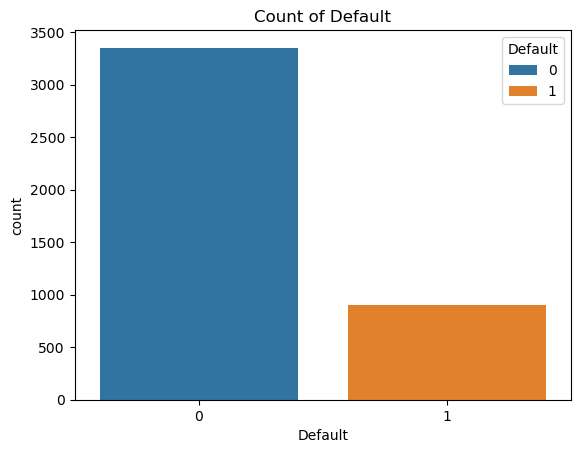

In [658]:
#Plotting a countplot for the target variable
sns.countplot(x = "Default", data = df, hue = 'Default')
plt.title('Count of Default')
plt.show()

In [659]:
# Percentage of defaulters
print('Percentage of Defaulters in the Dataset = ',round((df.Default.sum()/len(df)) * 100,2),'%')

# Clearly, the dataset is imbalanced & we shall use SMOTE technique in the later section to balance the target variable 

Percentage of Defaulters in the Dataset =  21.24 %


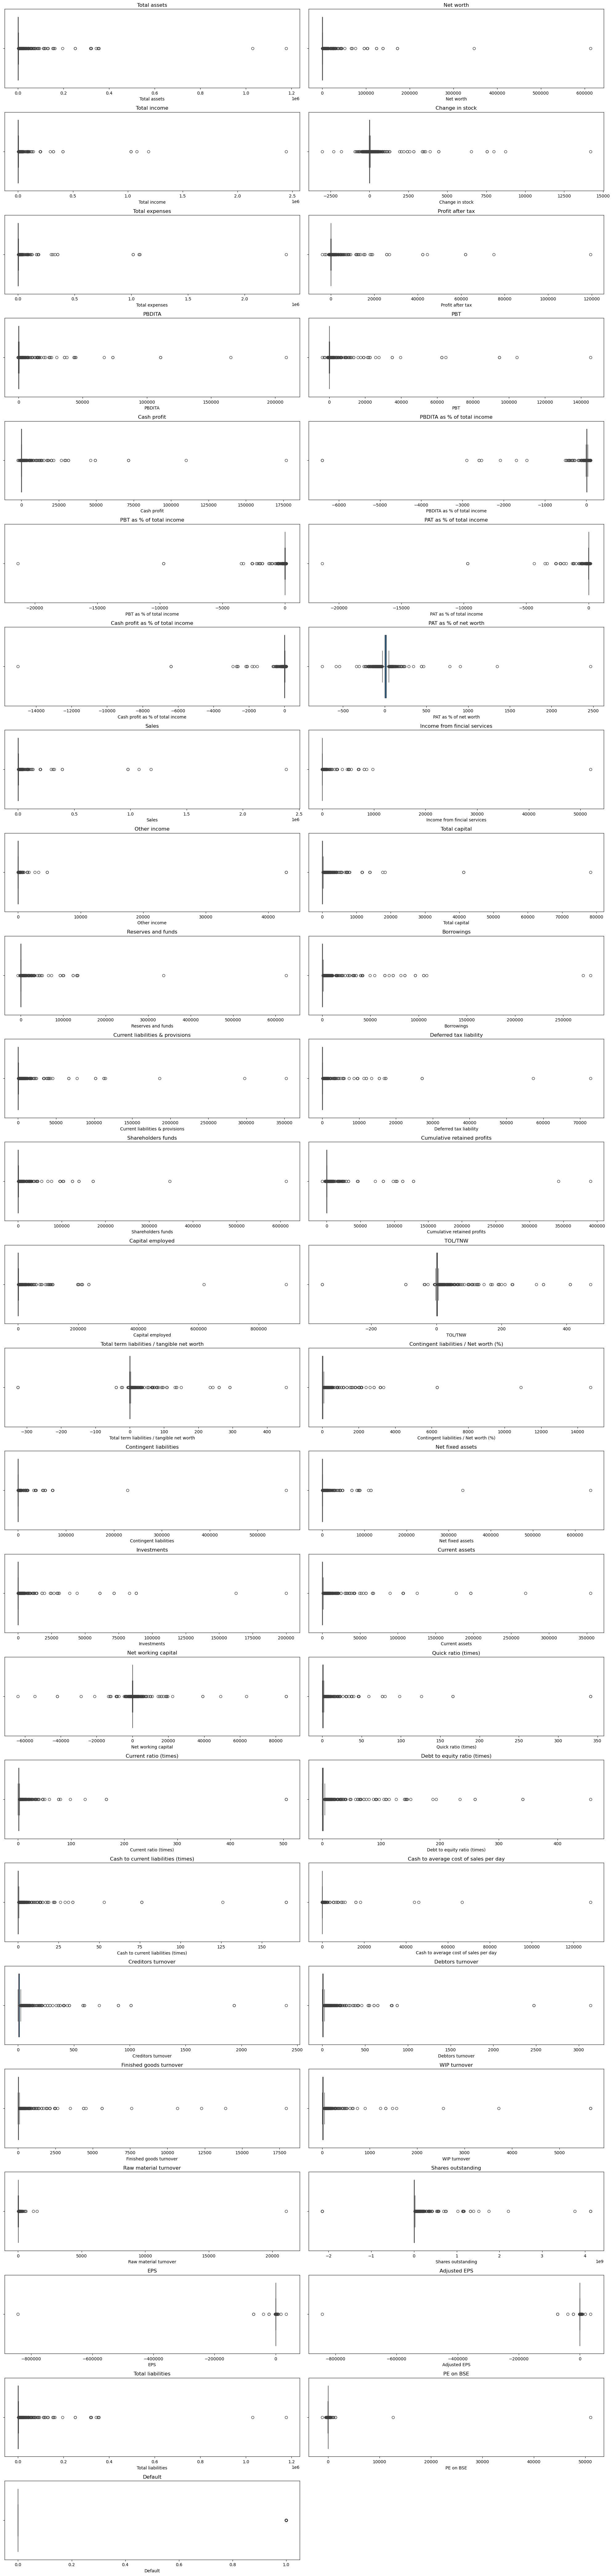

CPU times: total: 41.4 s
Wall time: 43.2 s


In [660]:
%%time
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 100))

for i, variable in enumerate(numeric_columns):
    plt.subplot(30, 2, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout()
    plt.title(variable)
plt.show()

*iter:  1
*iter:  2
*iter:  3
*iter:  4
*iter:  5
*iter:  6
*iter:  7
*iter:  8
*iter:  9
*iter:  10
*iter:  11
*iter:  12
*iter:  13
*iter:  14
*iter:  15
*iter:  16
*iter:  17
*iter:  18
*iter:  19
*iter:  20
*iter:  21
*iter:  22
*iter:  23
*iter:  24
*iter:  25
*iter:  26
*iter:  27
*iter:  28
*iter:  29
*iter:  30
*iter:  31
*iter:  32
*iter:  33
*iter:  34
*iter:  35
*iter:  36
*iter:  37
*iter:  38
*iter:  39
*iter:  40
*iter:  41
*iter:  42
*iter:  43
*iter:  44
*iter:  45
*iter:  46
*iter:  47
*iter:  48
*iter:  49


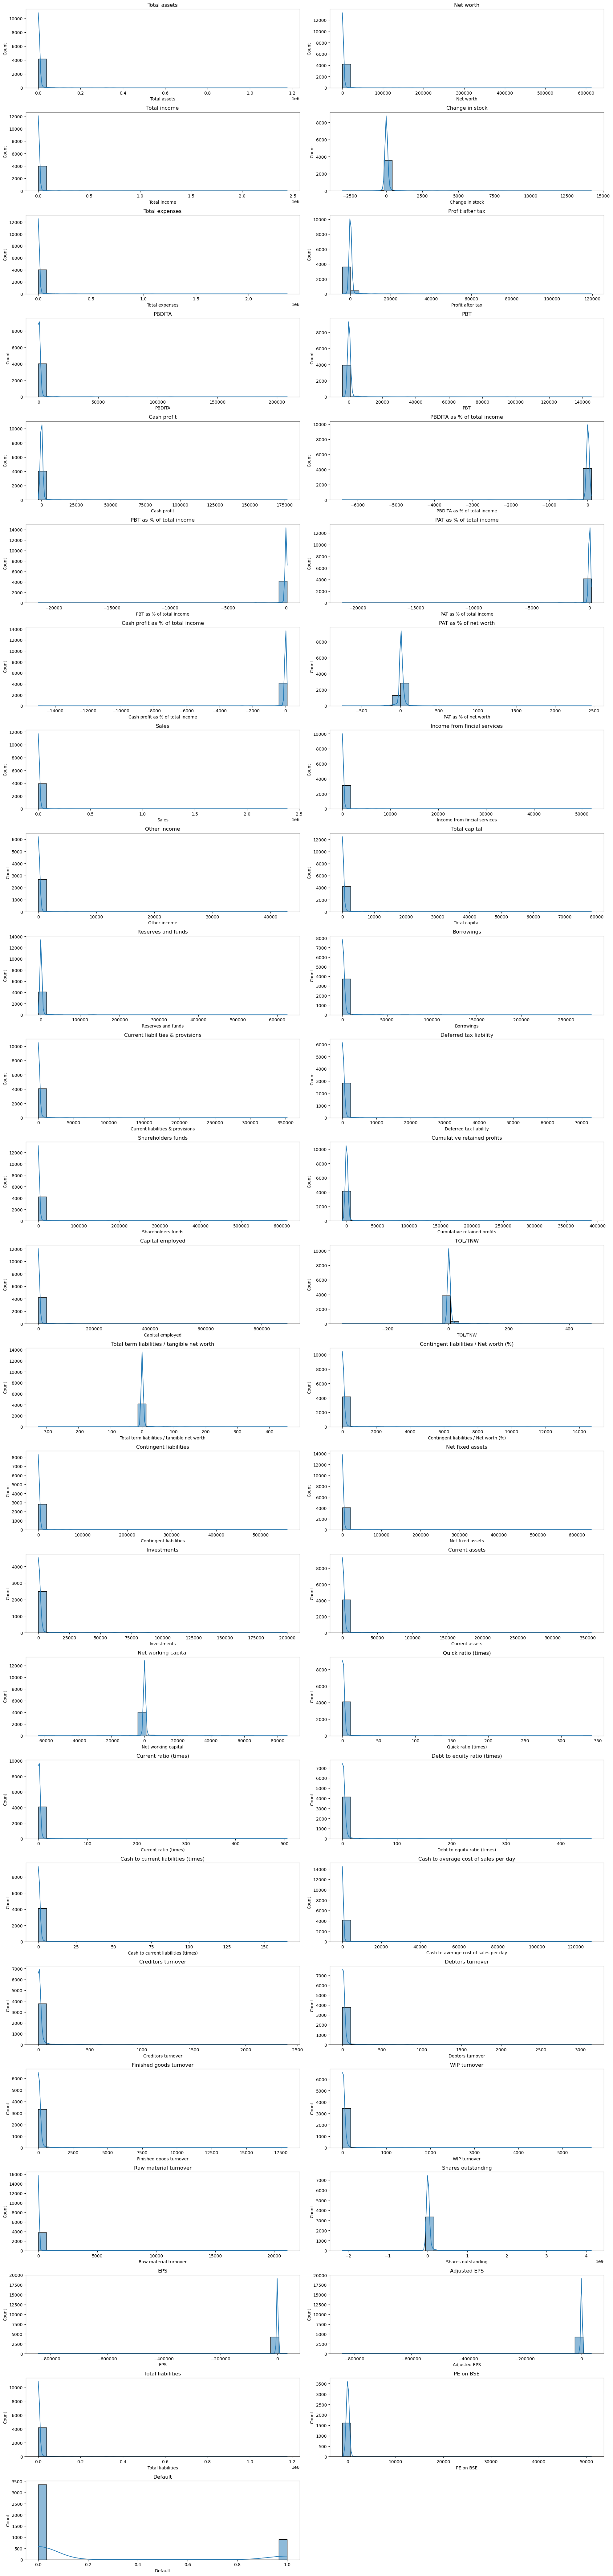

OPERATION COMPLETE
CPU times: total: 1min 15s
Wall time: 1min 18s


In [661]:
%%time
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 100))

for i, variable in enumerate(numeric_columns):
    print('*iter: ',i + 1)
    plt.subplot(30, 2, i + 1)
    sns.histplot(data=df, x=variable, kde=True, bins=30)
    plt.tight_layout()
    plt.title(variable)
plt.show()
print('OPERATION COMPLETE')

## Bivariate Analysis

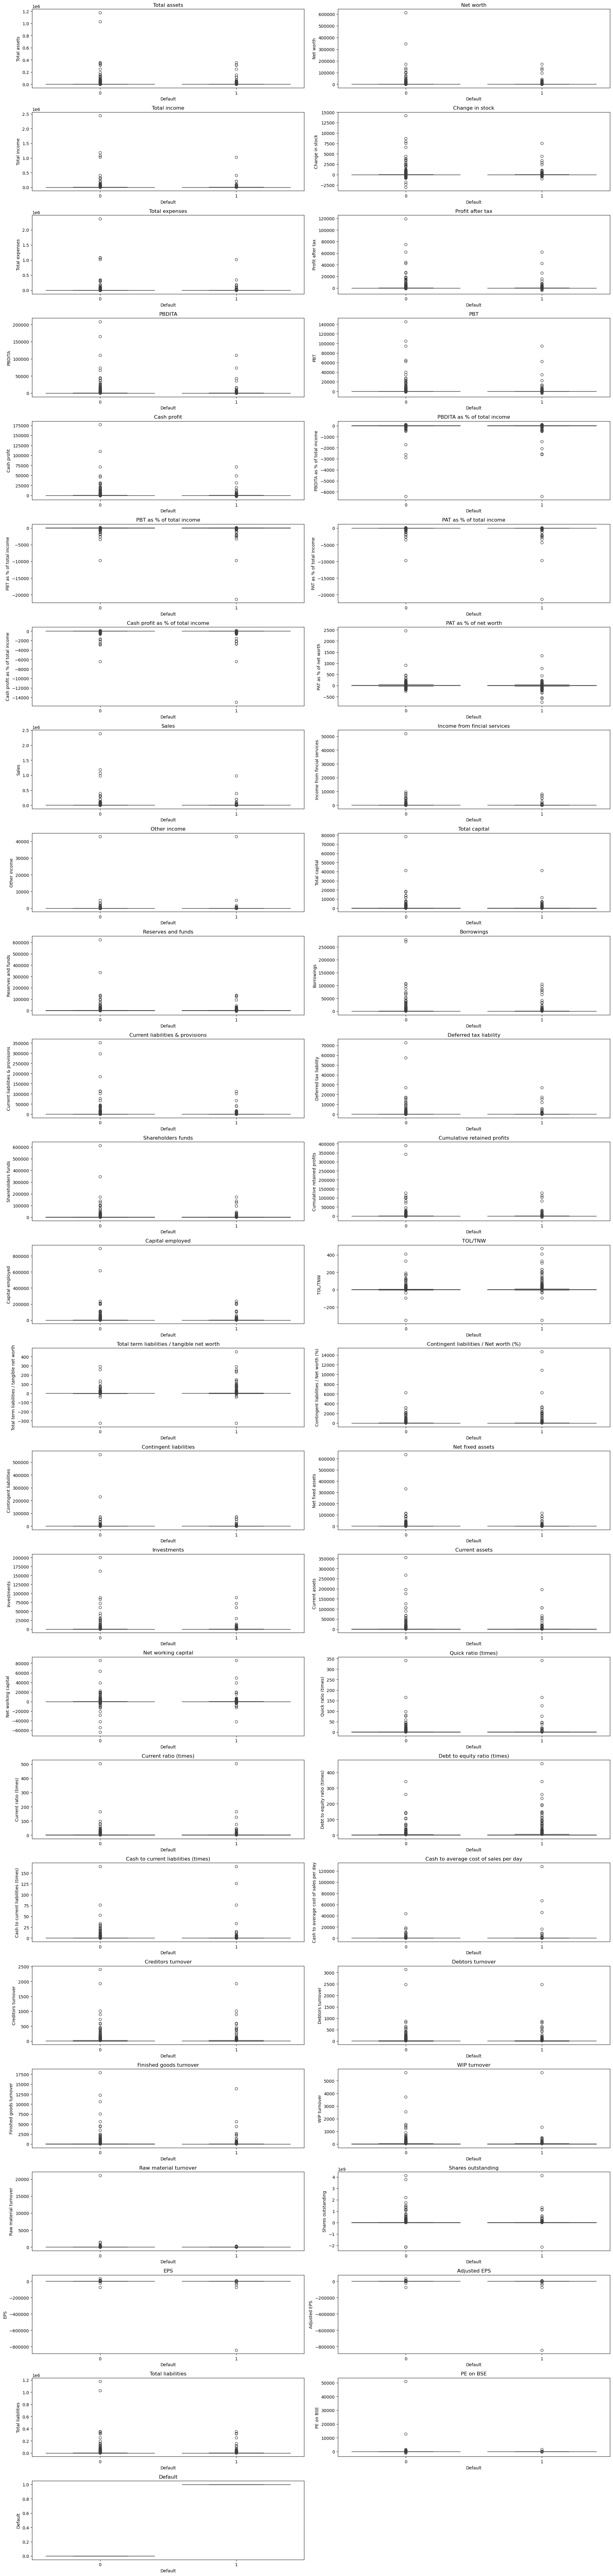

CPU times: total: 57.5 s
Wall time: 1min


In [663]:
%%time
#Get boxplots for all the numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 100))

for i, variable in enumerate(numeric_columns):
    plt.subplot(30, 2, i + 1)
    sns.boxplot(x=df['Default'], y=df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

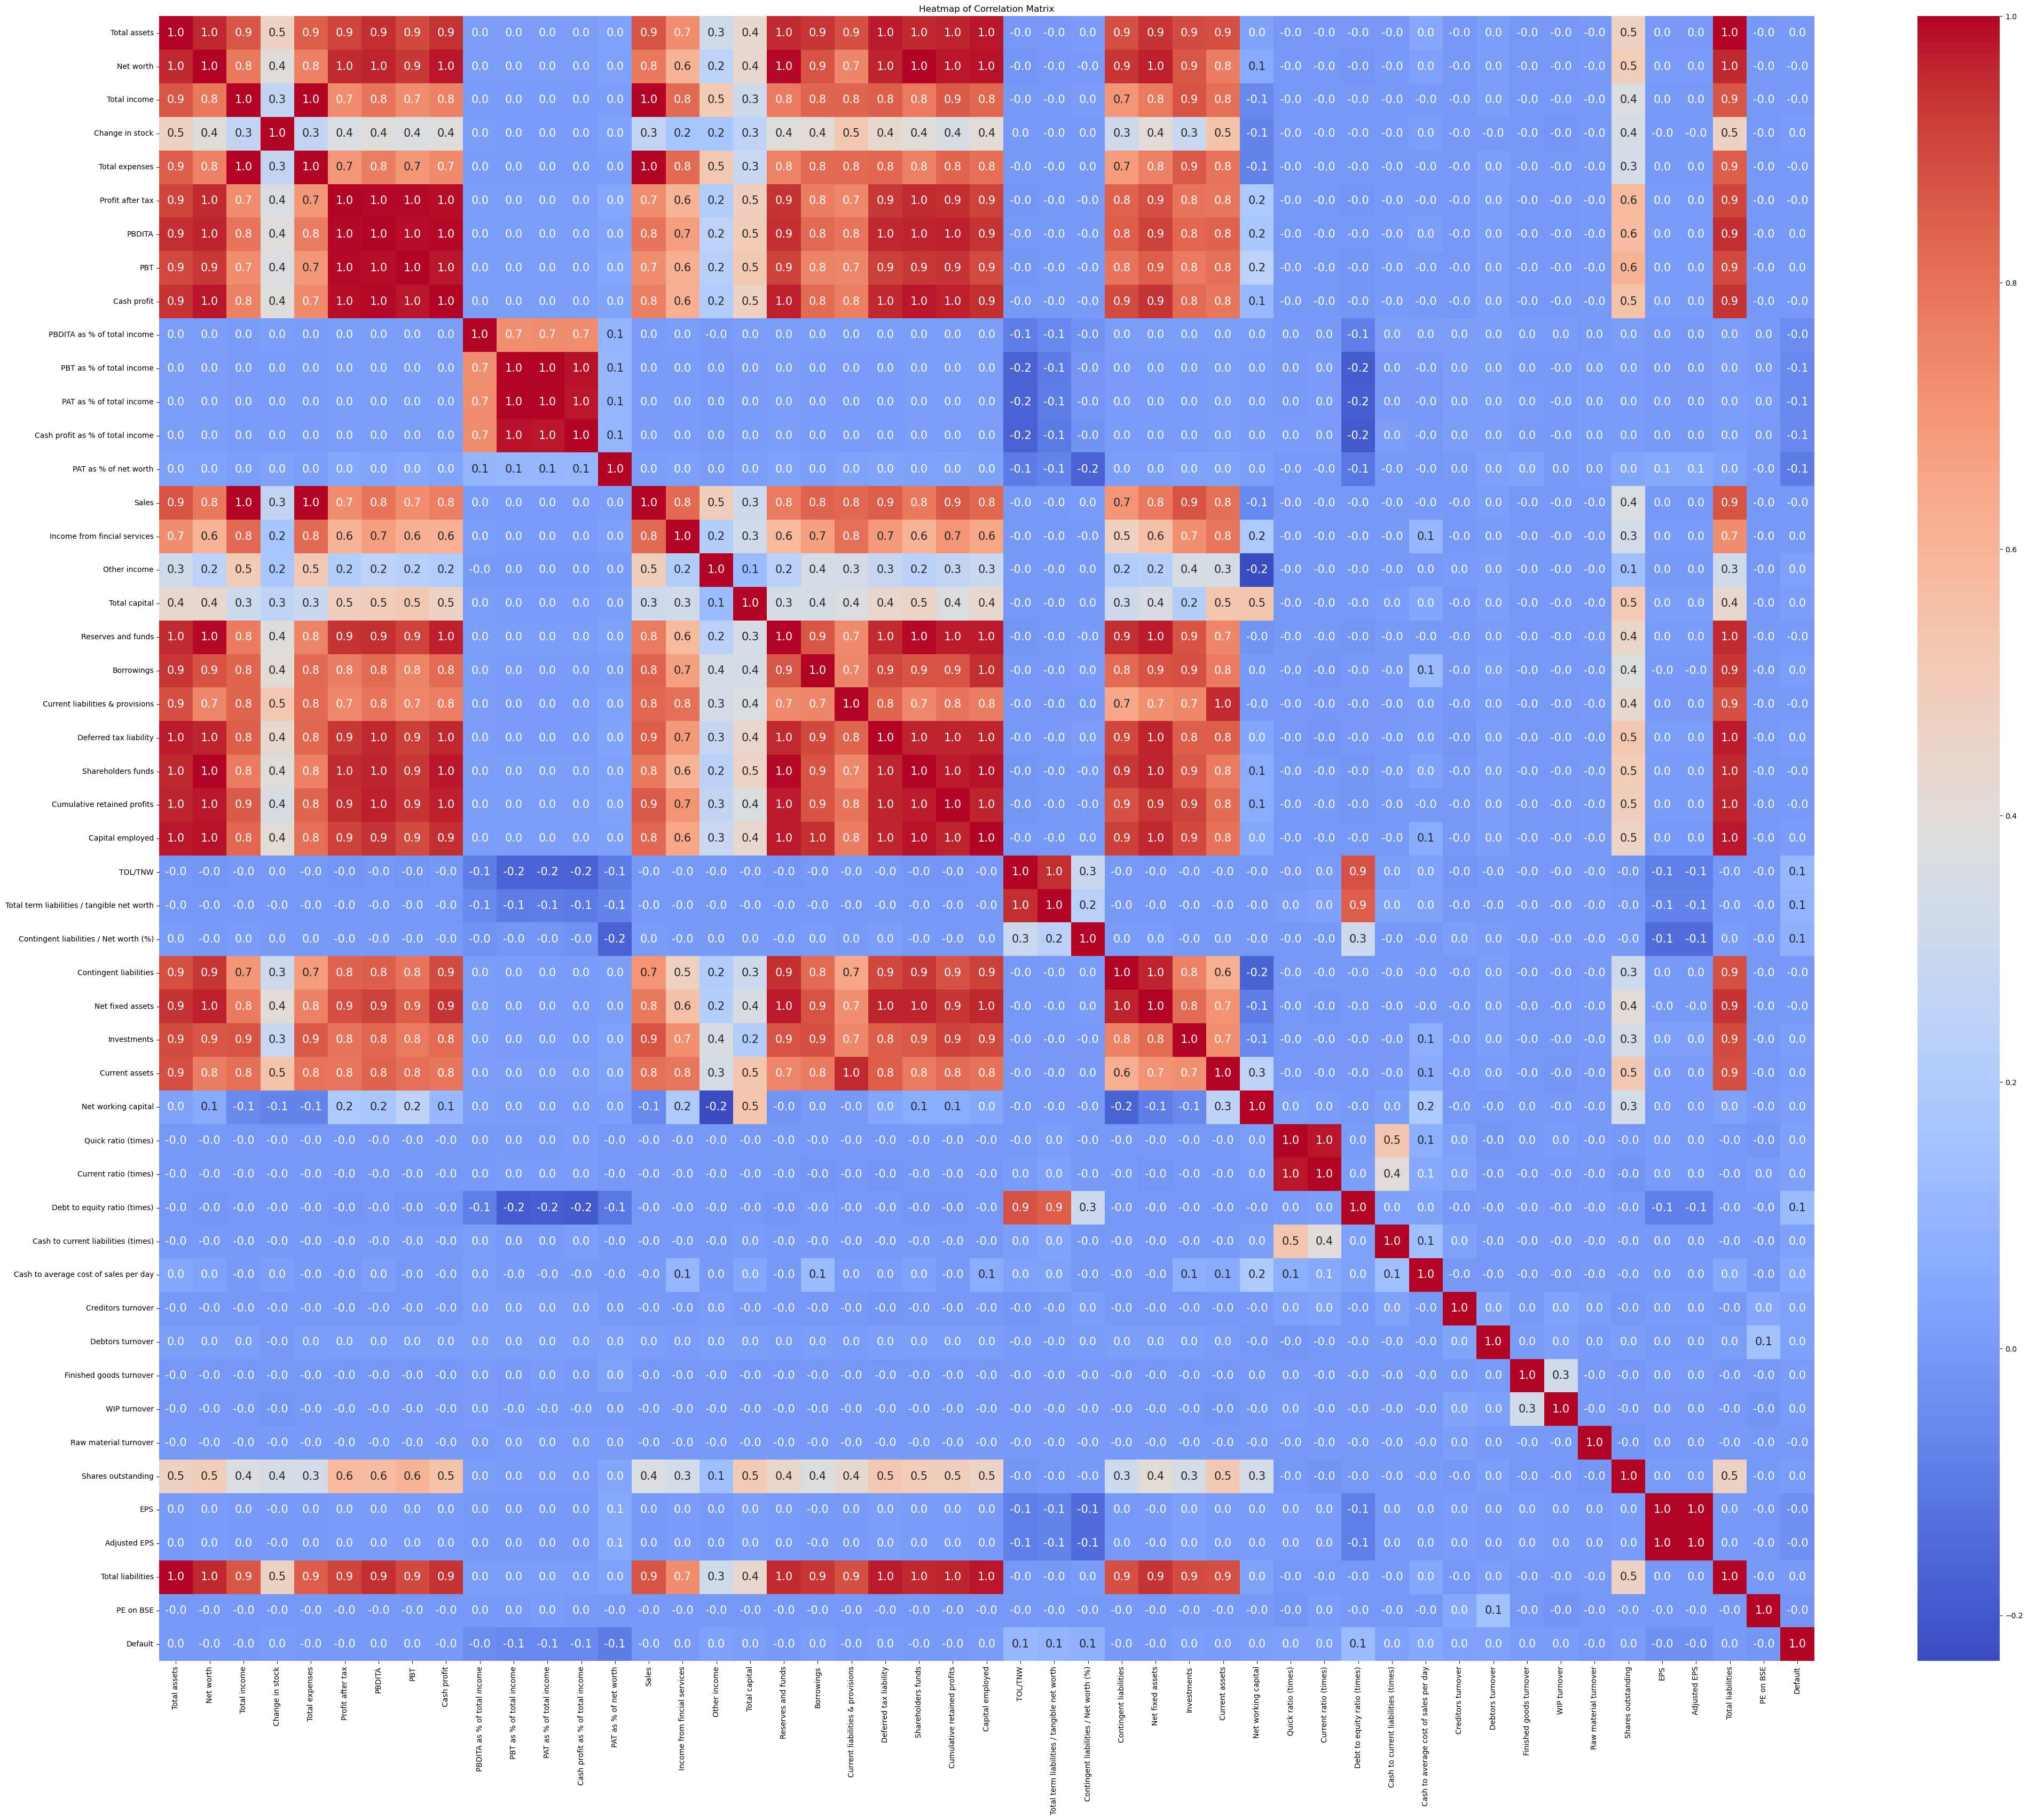

CPU times: total: 10 s
Wall time: 10.5 s


In [664]:
%%time
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 15})
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Data Preprocessing

## Outliers Check

In [667]:
outliers_count = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    #outliers_count[column] = len(outliers)
    outliers_count[column] = (len(outliers)/len(df))*100

print("Number of outliers in each column:")
pd.DataFrame([{'Column': column, 'Outliers Percentage': outliers} for column, outliers in outliers_count.items()])

# We choose to ignore outlilers

Number of outliers in each column:


Column  Outliers Percentage
0                                  Total assets             13.74530
1                                     Net worth             13.98026
2                                  Total income             11.93609
3                               Change in stock             17.62218
4                                Total expenses             12.17105
5                              Profit after tax             16.72932
6                                        PBDITA             13.72180
7                                           PBT             16.54135
8                                   Cash profit             14.73214
9                   PBDITA as % of total income              8.12970
10                     PBT as % of total income             12.82895
11                     PAT as % of total income             14.33271
12             Cash profit as % of total income             10.00940
13                        PAT as % of net worth             10.03289
14                                        Sales             11.74812
15                 Income from fincial services             12.14756
16                                 Other income              9.14004
17                                Total capital             12.94643
18                           Reserves and funds             15.10808
19                                   Borrowings             12.50000
20             Current liabilities & provisions             13.65132
21                       Deferred tax liability              9.53947
22                           Shareholders funds             13.81579
23                  Cumulative retained profits             16.42387
24                             Capital employed             13.43985
25                                      TOL/TNW              9.72744
26  Total term liabilities / tangible net worth              9.53947
27       Contingent liabilities / Net worth (%)             11.23120
28                       Contingent liabilities              9.23402
29                             Net fixed assets             13.36936
30                                  Investments             10.59680
31                               Current assets             12.50000
32                          Net working capital             18.93797
33                          Quick ratio (times)              8.71711
34                        Current ratio (times)              9.32801
35                 Debt to equity ratio (times)              8.95207
36          Cash to current liabilities (times)             12.66447
37        Cash to average cost of sales per day             13.69831
38                           Creditors turnover             10.38534
39                             Debtors turnover              9.58647
40                      Finished goods turnover              9.37500
41                                 WIP turnover              8.88158
42                        Raw material turnover              6.95489
43                           Shares outstanding             11.18421
44                                          EPS             14.99060
45                                 Adjusted EPS             16.30639
46                            Total liabilities             13.74530
47                                    PE on BSE              5.56861
48                                      Default             21.24060

## Data Preparation for Modeling

In [669]:
# Seperating target variable from the rest of the data
df_X = df.drop(['Default'], axis = 1)
df_y = df['Default']

#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42, stratify = df_y)

## Missing Values Detection and Treatment

In [671]:
#check missing values in X_train
print('Checking missing values in X_train')
X_train.isnull().sum()

Checking missing values in X_train


Total assets                                      0
Net worth                                         0
Total income                                    183
Change in stock                                 427
Total expenses                                  133
Profit after tax                                125
PBDITA                                          125
PBT                                             125
Cash profit                                     125
PBDITA as % of total income                      59
PBT as % of total income                         59
PAT as % of total income                         59
Cash profit as % of total income                 59
PAT as % of net worth                             0
Sales                                           237
Income from fincial services                    843
Other income                                   1179
Total capital                                     4
Reserves and funds                               78
Borrowings  

In [672]:
#check missing values in X_test
print('Checking missing values in X_test')
X_test.isnull().sum()

Checking missing values in X_test


Total assets                                     0
Net worth                                        0
Total income                                    48
Change in stock                                123
Total expenses                                  32
Profit after tax                                29
PBDITA                                          29
PBT                                             29
Cash profit                                     29
PBDITA as % of total income                     20
PBT as % of total income                        20
PAT as % of total income                        20
Cash profit as % of total income                20
PAT as % of net worth                            0
Sales                                           68
Income from fincial services                   268
Other income                                   377
Total capital                                    1
Reserves and funds                              20
Borrowings                     

In [673]:
#check missing values in y_train
print('Checking missing values in y_train')
y_train.isnull().sum()

Checking missing values in y_train


0

In [674]:
#check missing values in y_test
print('Checking missing values in y_test')
y_test.isnull().sum()

Checking missing values in y_test


0

In [675]:
# Scaling of features is done to bring all the features to the same scale.
# This is important before using SMOTE to address imbalance in data
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)


# treating missing values using KNNImputer
KNNimputerModel = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(KNNimputerModel.fit_transform(X_train_scaled), columns = X_train_scaled.columns)
X_test = pd.DataFrame(KNNimputerModel.fit_transform(X_test_scaled), columns = X_test_scaled.columns)

# check missing values post missing value treatment
print('Missing Values in X_train post Missing Value Treatment: \n\n',X_train.isnull().sum())
print('\n')
print('Missing Values in X_test post Missing Value Treatment: \n\n',X_test.isnull().sum())

Missing Values in X_train post Missing Value Treatment: 

 Total assets                                   0
Net worth                                      0
Total income                                   0
Change in stock                                0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    0
PBT as % of total income                       0
PAT as % of total income                       0
Cash profit as % of total income               0
PAT as % of net worth                          0
Sales                                          0
Income from fincial services                   0
Other income                                   0
Total capital                                  0
Reserves and funds                             0
Borrowings

## Treat Imbalance in Target Variable

In [677]:
print("Before SMOTE, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before SMOTE, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train)


print("After SMOTE, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("After SMOTE, counts of label 'No': {} \n".format(sum(y_train == 0)))


print("After SMOTE, the shape of train_X: {}".format(X_train.shape))
print("After SMOTE, the shape of train_y: {} \n".format(y_train.shape))

Before SMOTE, counts of label 'Yes': 678
Before SMOTE, counts of label 'No': 2514 

After SMOTE, counts of label 'Yes': 2514
After SMOTE, counts of label 'No': 2514 

After SMOTE, the shape of train_X: (5028, 48)
After SMOTE, the shape of train_y: (5028,) 



## Model Evaluation Criterion

*Metric of Choice*
- RECALL


In [680]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [681]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [683]:
# Adding constant to data for Logistic Regression
X_train_with_intercept = SM.add_constant(X_train)
X_test_with_intercept = SM.add_constant(X_test)

In [684]:
X_train_with_intercept.head()

const  Total assets  Net worth  Total income  Change in stock  \
0 1.00000      -0.14457   -0.10217      -0.09561         -0.34679   
1 1.00000      -0.14401   -0.13169      -0.04922         -0.10685   
2 1.00000      -0.16773   -0.15526      -0.11017         -0.11074   
3 1.00000      -0.13771   -0.14204      -0.09002          0.05817   
4 1.00000      -0.12843   -0.14670      -0.09146         -0.51040   

   Total expenses  Profit after tax   PBDITA      PBT  Cash profit  \
0        -0.09400          -0.10925 -0.12604 -0.10489     -0.11953   
1        -0.04365          -0.10763 -0.12247 -0.10193     -0.11691   
2        -0.10640          -0.11504 -0.13656 -0.11150     -0.13270   
3        -0.08419          -0.10877 -0.11259 -0.10498     -0.10124   
4        -0.09116          -0.11238 -0.11773 -0.10972     -0.13551   

   PBDITA as % of total income  PBT as % of total income  \
0                      0.03142                   0.05371   
1                      0.00519                   0.04820   
2                      0.25968                   0.15482   
3                      0.05540                   0.05131   
4                      0.04593                   0.04736   

   PAT as % of total income  Cash profit as % of total income  \
0                   0.05322                           0.05353   
1                   0.04962                           0.04024   
2                   0.14771                           0.17395   
3                   0.05207                           0.06649   
4                   0.05008                           0.03236   

   PAT as % of net worth    Sales  Income from fincial services  Other income  \
0               -0.10615 -0.09682                      -0.13051      -0.04659   
1               -0.15907 -0.04919                      -0.13542      -0.04672   
2               -0.00215 -0.11151                      -0.12850      -0.04524   
3                0.06462 -0.09099                      -0.13475      -0.04519   
4                0.02893 -0.09371                      -0.13542      -0.04532   

   Total capital  Reserves and funds  Borrowings  \
0        0.20887            -0.15247    -0.17040   
1       -0.17726            -0.12129    -0.13614   
2       -0.17947            -0.14614    -0.17026   
3       -0.11051            -0.13124    -0.12517   
4        0.17039            -0.16583    -0.11071   

   Current liabilities & provisions  Deferred tax liability  \
0                          -0.14984                -0.14515   
1                          -0.14798                -0.14858   
2                          -0.15406                -0.15669   
3                          -0.14075                -0.14691   
4                          -0.14208                -0.12907   

   Shareholders funds  Cumulative retained profits  Capital employed  TOL/TNW  \
0            -0.10464                     -0.13746          -0.13809 -0.19165   
1            -0.13408                     -0.10167          -0.13772 -0.13277   
2            -0.15760                     -0.13019          -0.16892 -0.18073   
3            -0.13325                     -0.11642          -0.13171 -0.03401   
4            -0.14487                     -0.18485          -0.13119  0.09656   

   Total term liabilities / tangible net worth  \
0                                     -0.11384   
1                                     -0.09621   
2                                     -0.11384   
3                                      0.00354   
4                                      0.07287   

   Contingent liabilities / Net worth (%)  Contingent liabilities  \
0                                -0.12024                -0.14716   
1                                -0.14704                -0.15259   
2                                -0.14704                -0.15567   
3                                -0.09892                -0.15191   
4                                 0.02021                -0.14584   

   Net fixed assets  Investments  

In [685]:
y_train.reset_index(inplace = True, drop = True)

In [686]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

Optimization terminated successfully.
         Current function value: 0.659264
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 5028
Model:                          Logit   Df Residuals:                     4980
Method:                           MLE   Df Model:                           47
Date:                Wed, 28 May 2025   Pseudo R-squ.:                 0.04888
Time:                        22:37:20   Log-Likelihood:                -3314.8
converged:                       True   LL-Null:                       -3485.1
Covariance Type:            nonrobust   LLR p-value:                 3.540e-46
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                     

### Logistic Regression Model - Training Performance

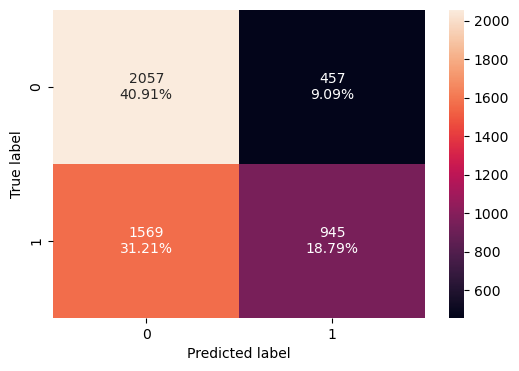

In [688]:
model_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

In [689]:
logistic_regression_perf_train = model_performance_classification(LogisticReg, X_train_with_intercept, y_train)
logistic_regression_perf_train

Accuracy  Recall  Precision      F1
0   0.59706 0.37589    0.67404 0.48264

### Logistic Regression Model - Test Performance

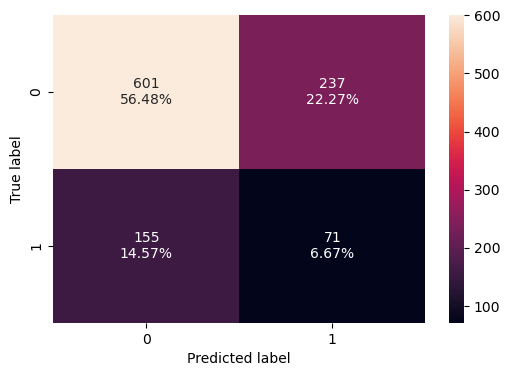

In [691]:
model_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

In [692]:
logistic_regression_perf_test = model_performance_classification(LogisticReg, X_test_with_intercept, y_test)
logistic_regression_perf_test

Accuracy  Recall  Precision      F1
0   0.63158 0.31416    0.23052 0.26592

## Random Forest

In [694]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_model = rf_classifier.fit(X_train, y_train)

### Random Forest Model - Training Performance

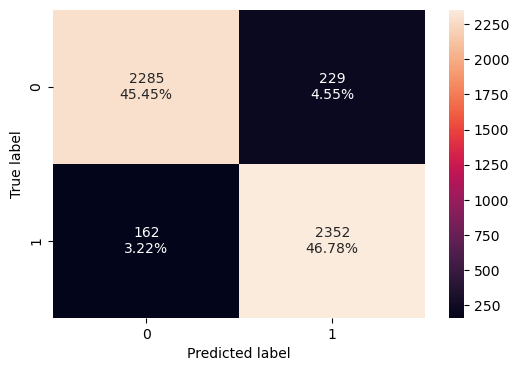

In [696]:
model_confusion_matrix(rf_model, X_train, y_train)

In [697]:
random_forest_perf_train = model_performance_classification(rf_model, X_train, y_train)
random_forest_perf_train

Accuracy  Recall  Precision      F1
0   0.92224 0.93556    0.91127 0.92326

### Random Forest Model - Test Performance

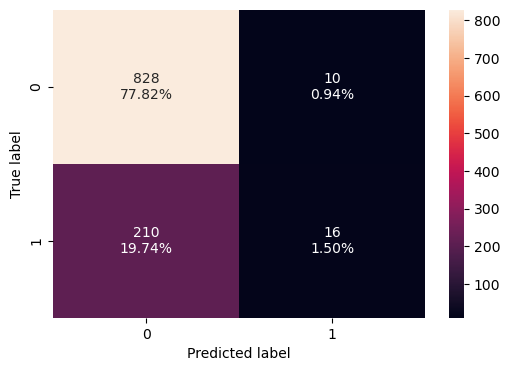

In [699]:
model_confusion_matrix(rf_model, X_test, y_test)

In [700]:
random_forest_perf_test = model_performance_classification(rf_model, X_test, y_test)
random_forest_perf_test

Accuracy  Recall  Precision      F1
0   0.79323 0.07080    0.61538 0.12698

# Model Performance Improvement

## Model Performance Improvement - Logistic Regression

In [703]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [704]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train)

print("Variance Inflation Factors:")
vif_result.sort_values(by='VIF',ascending=False)

Variance Inflation Factors:


Variable           VIF
0                                  Total assets           inf
46                            Total liabilities           inf
45                                 Adjusted EPS 2089147.54510
44                                          EPS 2089144.50303
2                                  Total income  385487.18437
4                                Total expenses  192959.62521
14                                        Sales   67242.32902
24                             Capital employed    9608.67052
22                           Shareholders funds    4851.65224
1                                     Net worth    2367.61412
5                              Profit after tax    2206.24072
10                     PBT as % of total income    2129.57506
11                     PAT as % of total income    2008.59364
7                                           PBT    1235.05823
20             Current liabilities & provisions     960.51923
19                                   Borrowings     866.84859
6                                        PBDITA     745.96346
18                           Reserves and funds     743.67904
8                                   Cash profit     516.34866
23                  Cumulative retained profits     128.79489
31                               Current assets     118.32839
33                          Quick ratio (times)      81.27745
29                             Net fixed assets      78.97122
16                                 Other income      78.26072
34                        Current ratio (times)      69.35457
12             Cash profit as % of total income      57.29069
21                       Deferred tax liability      49.77574
17                                Total capital      33.26338
3                               Change in stock      20.19297
32                          Net working capital      20.05024
30                                  Investments      16.55961
25                                      TOL/TNW      14.93245
28                       Contingent liabilities      13.51993
26  Total term liabilities / tangible net worth      12.24888
15                 Income from fincial services      12.05318
35                 Debt to equity ratio (times)       5.60751
36          Cash to current liabilities (times)       3.76160
43                           Shares outstanding       2.97301
37        Cash to average cost of sales per day       2.62771
9                   PBDITA as % of total income       2.54937
13                        PAT as % of net worth       1.16188
27       Contingent liabilities / Net worth (%)       1.15495
38                           Creditors turnover       1.06640
41                                 WIP turnover       1.06042
40                      Finished goods turnover       1.05487
39                             Debtors turnover       1.02353
47                                    PE on BSE       1.00490
42                        Raw material turnover       1.00049

In [705]:
%%time
# Dropping columns with VIF > 5 iteratively
i_vif = 0
while vif_result['VIF'].max() > 5: 
     high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
     print('**iter: ',i_vif+1,' | Dropping: "{}" due to high VIF'.format(high_vif_column))
     X_train.drop(columns=high_vif_column, inplace=True)
     X_test.drop(columns=high_vif_column, inplace=True)
     vif_result = calculate_vif(X_train)
     i_vif = i_vif + 1
     print('\nVIF Result\n',vif_result.sort_values(by='VIF',ascending=False),'\n')

print('OPERATION COMPLETED')

**iter:  1  | Dropping: "Total assets" due to high VIF

VIF Result
                                        Variable           VIF
44                                 Adjusted EPS 2089147.54510
43                                          EPS 2089144.50303
1                                  Total income  385487.18437
3                                Total expenses  192959.62521
13                                        Sales   67242.32902
45                            Total liabilities   11604.50437
23                             Capital employed    9608.67052
21                           Shareholders funds    4851.65224
0                                     Net worth    2367.61412
4                              Profit after tax    2206.24072
9                      PBT as % of total income    2129.57506
10                     PAT as % of total income    2008.59364
6                                           PBT    1235.05823
19             Current liabilities & provisions     960.51923
18

In [706]:
X_train.shape

(5028, 24)

In [707]:
X_test.shape

(1064, 24)

In [708]:
X_train_new_with_intercept = SM.add_constant(X_train)
X_test_new_with_intercept = SM.add_constant(X_test)

In [709]:
# Retraining Logistic Regression Model with new data
LogisticReg_improved = SM.Logit(y_train, X_train_new_with_intercept).fit()
print(LogisticReg_improved.summary())

Optimization terminated successfully.
         Current function value: 0.664444
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 5028
Model:                          Logit   Df Residuals:                     5003
Method:                           MLE   Df Model:                           24
Date:                Wed, 28 May 2025   Pseudo R-squ.:                 0.04141
Time:                        22:45:27   Log-Likelihood:                -3340.8
converged:                       True   LL-Null:                       -3485.1
Covariance Type:            nonrobust   LLR p-value:                 3.225e-47
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                     

In [710]:
# Finding Optimal Threshold value
logit_y_pred = LogisticReg_improved.predict(X_train_new_with_intercept)
fpr, tpr, thresholds = roc_curve(y_train, logit_y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print('Optimal Threshold: ',optimal_threshold_logit)

Optimal Threshold:  0.525


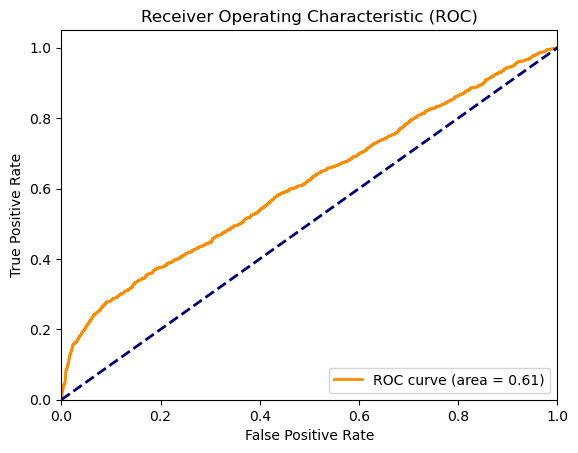

In [711]:
roc_auc = roc_auc_score(y_train, logit_y_pred)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Performance - Training Set

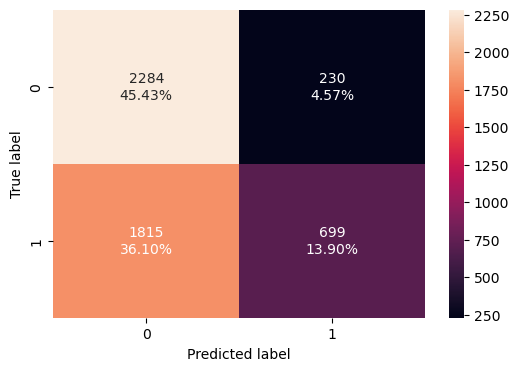

In [713]:
model_confusion_matrix(LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit)

In [714]:
logistic_regression_tuned_perf_train = model_performance_classification(
    LogisticReg_improved, X_train_new_with_intercept, y_train, optimal_threshold_logit
)
logistic_regression_tuned_perf_train

Accuracy  Recall  Precision      F1
0   0.59328 0.27804    0.75242 0.40604

### Logistic Regression Performance - Test Set

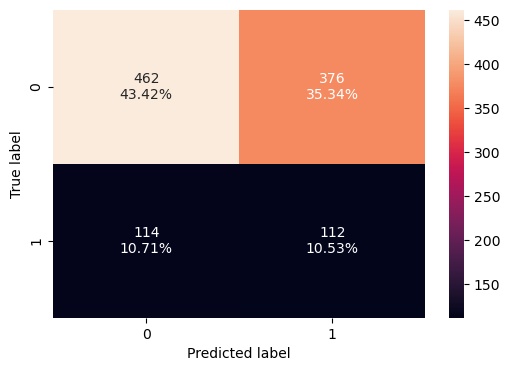

In [716]:
model_confusion_matrix(LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit)

In [717]:
logistic_regression_tuned_perf_test = model_performance_classification(
    LogisticReg_improved, X_test_new_with_intercept, y_test, optimal_threshold_logit
)
logistic_regression_tuned_perf_test

Accuracy  Recall  Precision      F1
0   0.53947 0.49558    0.22951 0.31373

## Model Performance Improvement - Random Forest

In [830]:
%%time

from scipy.stats import randint
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [2, 3],    # Maximum depth of the trees
    'min_samples_split': [500, 1000],    # Minimum number of samples required to split a node
    'min_samples_leaf': [500, 1000],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt'], # Maximum number of features
    'class_weight': ['balanced'] # class weight type
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'class_weight': 'balanced', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1000, 'min_samples_split': 500, 'n_estimators': 100}
CPU times: total: 1.36 s
Wall time: 7.2 s


In [832]:
# Access the best estimator directly if needed
best_rf_classifier = grid_search.best_estimator_

In [834]:
params_used = best_rf_classifier.get_params()

# Print the parameters
print("Parameters used in the Random Forest Classifier:")
for param_name, param_value in params_used.items():
    print(f"{param_name}: {param_value}")

Parameters used in the Random Forest Classifier:
bootstrap: True
ccp_alpha: 0.0
class_weight: balanced
criterion: gini
max_depth: 2
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1000
min_samples_split: 500
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


### Random Forest Performance - Training Set

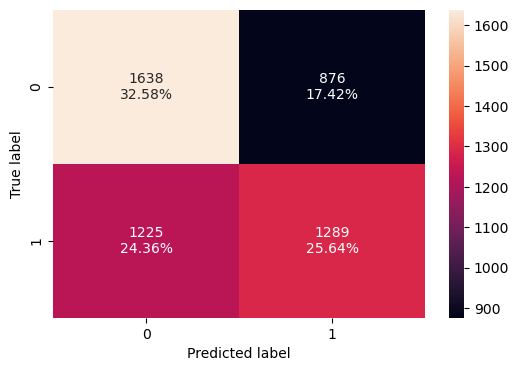

In [836]:
model_confusion_matrix(best_rf_classifier, X_train, y_train)

In [838]:
random_forest_tuned_perf_train = model_performance_classification(best_rf_classifier, X_train, y_train)
random_forest_tuned_perf_train

Accuracy  Recall  Precision      F1
0   0.58214 0.51273    0.59538 0.55097

### Random Forest Performance - Test Set

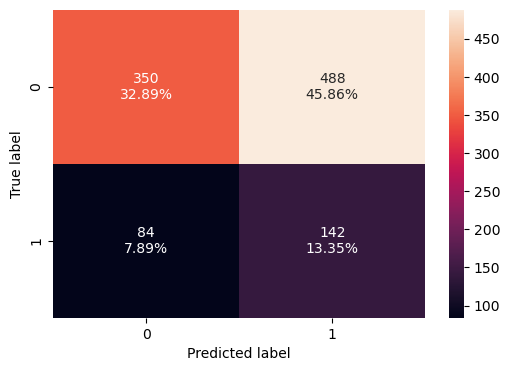

In [840]:
model_confusion_matrix(best_rf_classifier, X_test, y_test)

In [842]:
random_forest_tuned_perf_test = model_performance_classification(best_rf_classifier, X_test, y_test)
random_forest_tuned_perf_test

Accuracy  Recall  Precision      F1
0   0.46241 0.62832    0.22540 0.33178

# Model Comparison and Final Model Selection

In [844]:
models_train_comp_df = []

In [846]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_regression_perf_train.T,
        logistic_regression_tuned_perf_train.T,
        random_forest_perf_train.T,
        random_forest_tuned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression  Tuned Logistic Regression  Random Forest  \
Accuracy               0.59706                    0.59328        0.92224   
Recall                 0.37589                    0.27804        0.93556   
Precision              0.67404                    0.75242        0.91127   
F1                     0.48264                    0.40604        0.92326   

           Tuned Random Forest  
Accuracy               0.58214  
Recall                 0.51273  
Precision              0.59538  
F1                     0.55097

In [848]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf_test.T,
        logistic_regression_tuned_perf_test.T,
        random_forest_perf_test.T,
        random_forest_tuned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Tuned Logistic Regression",
    "Random Forest",
    "Tuned Random Forest",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Logistic Regression  Tuned Logistic Regression  Random Forest  \
Accuracy               0.63158                    0.53947        0.79323   
Recall                 0.31416                    0.49558        0.07080   
Precision              0.23052                    0.22951        0.61538   
F1                     0.26592                    0.31373        0.12698   

           Tuned Random Forest  
Accuracy               0.46241  
Recall                 0.62832  
Precision              0.22540  
F1                     0.33178

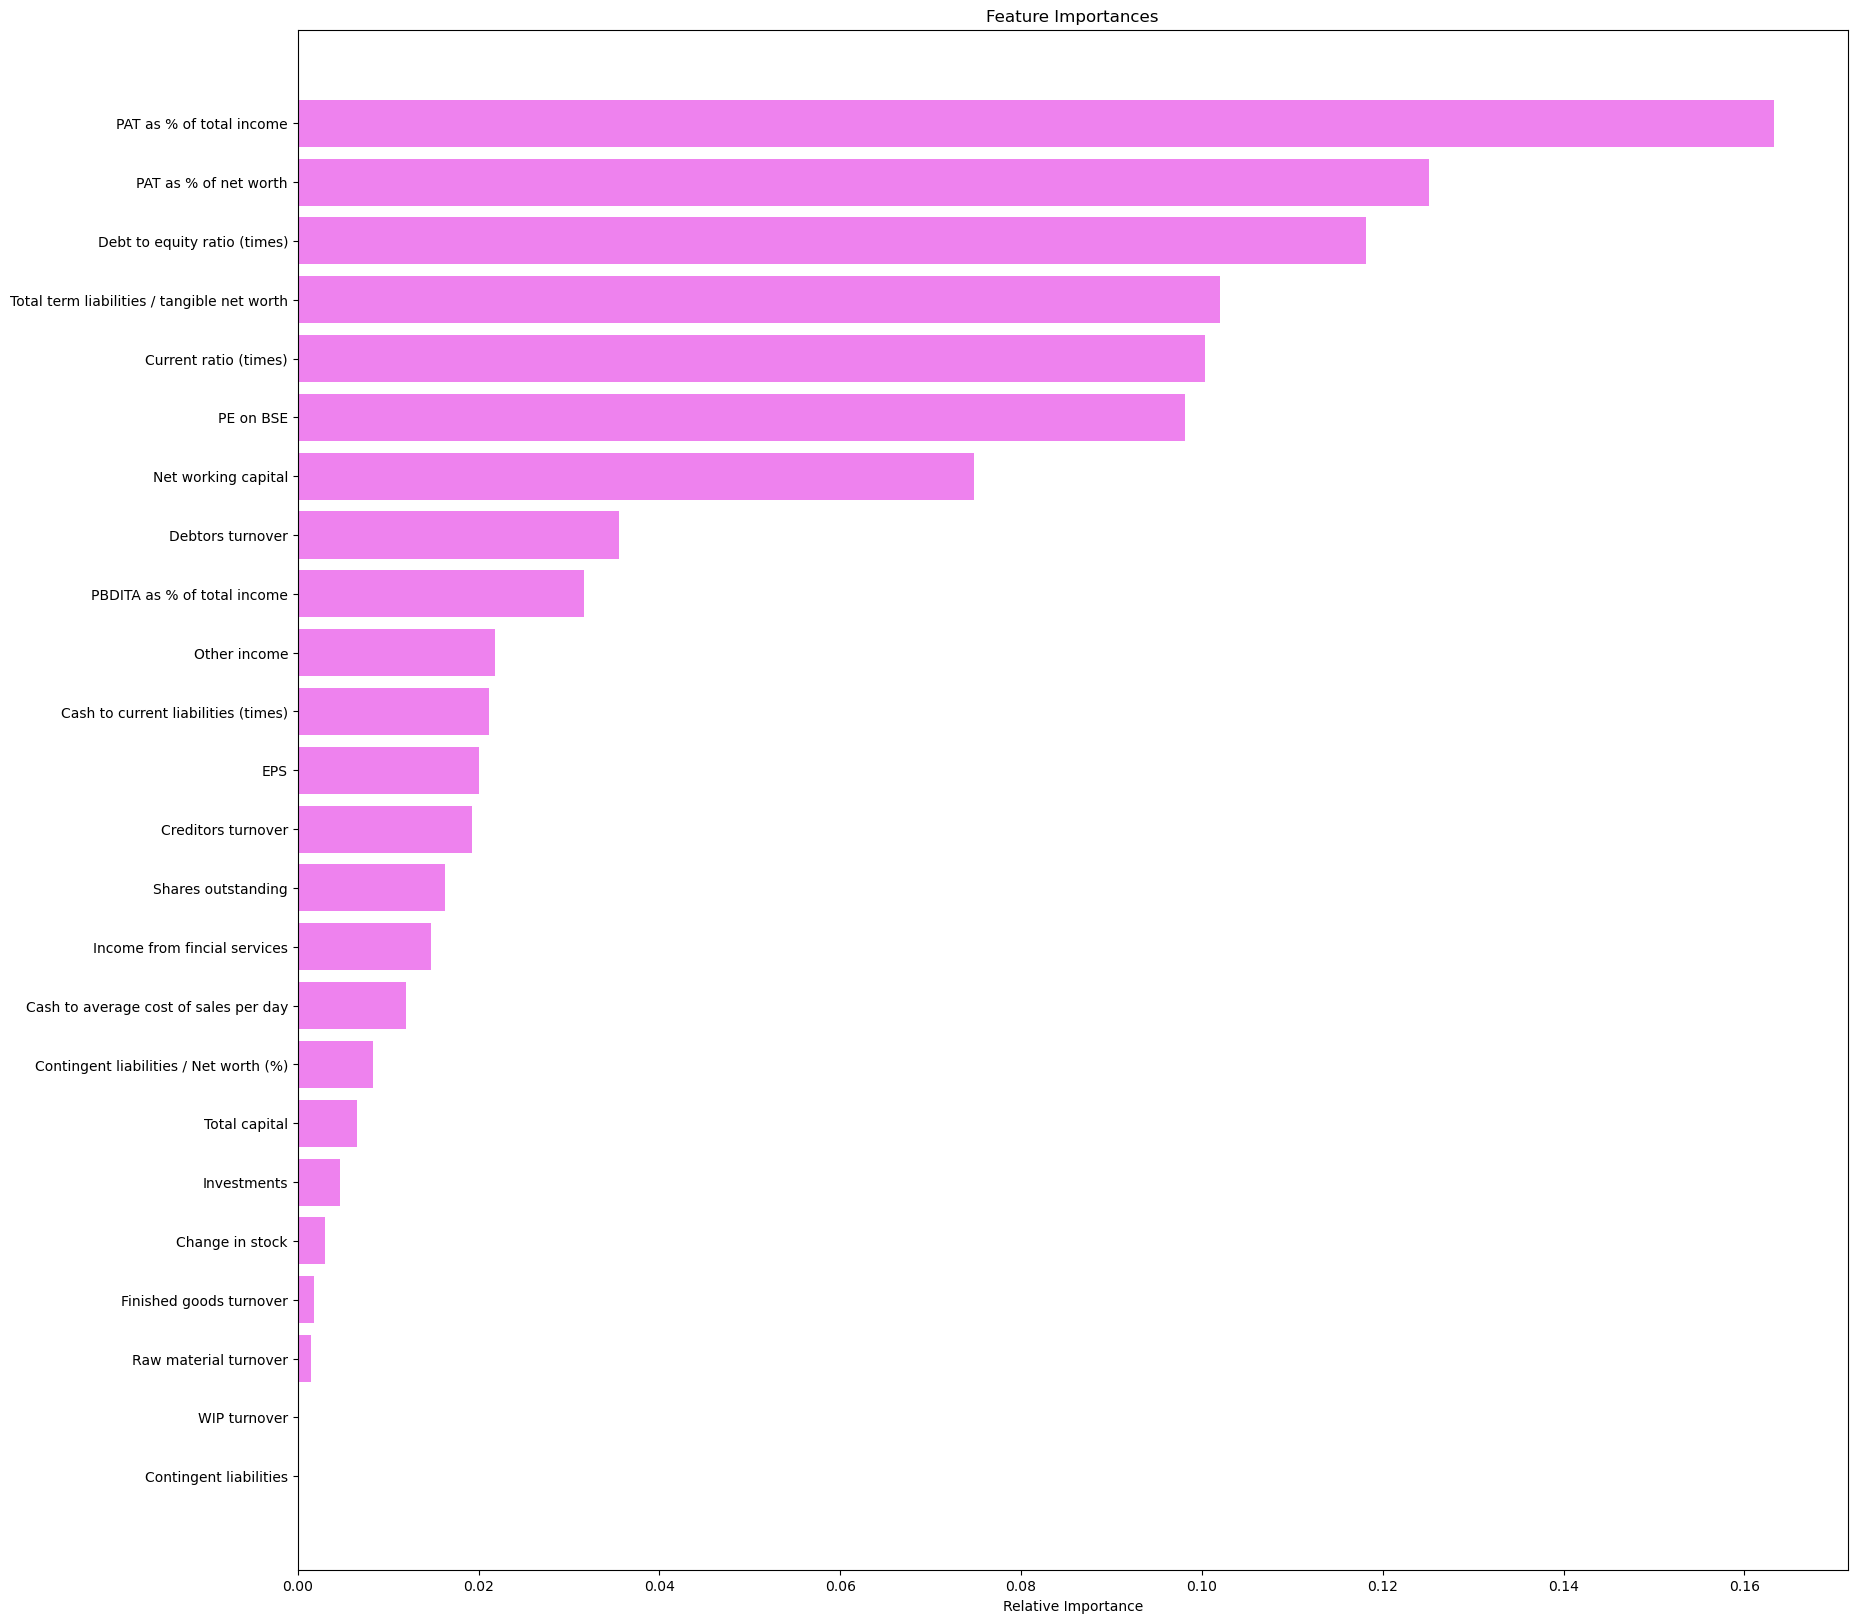

In [850]:
feature_names = X_train.columns
importances = best_rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Conclusions and Recommendations

*
Please refer Business Report
___